## [Public Policy 190] Exploring Labor Statistics among U.S. Youth
### Professor Anibel Ferus-Comelo

***

### Learning Outcomes

*Estimated time: 60 minutes*

***

### Table of Contents
* Wages among the Youth
* Wage differences among youth between ethnicities
* Employment among the Youth
* Data Science Opportunities 

***


In [29]:
# import the required modules
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

Today, we will be analyzing the characteristics of the labor market for young people in the United States, utilizing the skills we have learned in the two previous Modules notebooks we have been working on in and outside of class. We will discover patters and trends over the years regarding employment and wages among American youth, utilizing datasets from the [US Bureau of Labor Statistics](https://www.bls.gov/data/). Here we define *youth* to be between the ages of 16 and 24 years old. 

Data Science Resources

Here are some resources you can check out to explore!

- [DATA 8 Textbook](https://inferentialthinking.com/chapters/06/Tables.html)
- [Reference Sheet for the datascience Module](http://data8.org/sp22/python-reference.html)
- [Documentation for the datascience Modules](http://data8.org/datascience/index.html)
- [Statistica: Find Data on Interesting Topics](https://www.statista.com/)
- [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

## 1. Wages among the Youth

We are going to use some of the methods in this reference sheet, and you will learn more about them in your homework. 

For now, I am going to refer to this sheet when explaining methods I used: 

  [Reference Sheet for the datascience Module](http://data8.org/sp22/python-reference.html)

This dataset below represents the earnings of employed persons, derived from the Current Population Survey.  The wages represented include earnings before taxes and other deductions and include any overtime pay, commissions, or tips usually received. 

The goal of part one is to show let the students learn the basic table manipulation method by plotting a line graph of sex wage differences by year.

As you may notice from the names of each column, the dataset covers the total number of workers and median weekly earnings annually for various age groups and sex among the years 2000-2021. 

<div class="alert alert-warning">
    
- `Table.read_table`: allows you to import data as a table (takes in the name of the csv file as the argument)
    
</div>

In [30]:
earnings = Table.read_table("Data/Earnings.csv")
earnings

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,16-24 Years Old,All,All,361
2001,16-24 Years Old,All,All,375
2002,16-24 Years Old,All,All,381
2003,16-24 Years Old,All,All,387
2004,16-24 Years Old,All,All,390
2005,16-24 Years Old,All,All,397
2006,16-24 Years Old,All,All,409
2007,16-24 Years Old,All,All,424
2008,16-24 Years Old,All,All,443
2009,16-24 Years Old,All,All,442


**Question 1a:** In the cell below, create two tables `youth_earnings` and `all_earnings`. 
- `youth_earnings` contains data on 16-24 Year Olds of all Sexes and Ethnicities 
- `all_earnings` contains data on all laborers of all Sexes and Ethnicities

*Hint:* Which table method can you use to create a copy of the original table with only the rows that match the predicate?

<div class="alert alert-warning"

- `.where`: filter a table based on the values of a particular column (see the `Table.where` Predicates section of the [Python reference](http://data8.org/sp22/python-reference.html) for the list of predicates you can use)
     
</div>

In [31]:
# create two separate tables
youth_earnings = earnings.where("Age", are.equal_to("16-24 Years Old")).where("Sex", are.equal_to("All"))
all_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("All"))

In [32]:
youth_earnings

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,16-24 Years Old,All,All,361
2001,16-24 Years Old,All,All,375
2002,16-24 Years Old,All,All,381
2003,16-24 Years Old,All,All,387
2004,16-24 Years Old,All,All,390
2005,16-24 Years Old,All,All,397
2006,16-24 Years Old,All,All,409
2007,16-24 Years Old,All,All,424
2008,16-24 Years Old,All,All,443
2009,16-24 Years Old,All,All,442


In [33]:
all_earnings

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,All,All,All,576
2001,All,All,All,596
2002,All,All,All,608
2003,All,All,All,620
2004,All,All,All,638
2005,All,All,All,651
2006,All,All,All,671
2007,All,All,All,695
2008,All,All,All,722
2009,All,All,All,739


**Question 1b:** After you assign the table to each variable, compute the average of median weekly earnings for each table and find the difference between their wages. 

In [34]:
# find the difference in the average median weekly earnings between each table
youth_earnings_avg = np.mean(youth_earnings.column("Median Weekly Earnings"))
average_earnings = np.mean(all_earnings.column("Median Weekly Earnings"))
diff = np.round(average_earnings - youth_earnings_avg, 2)

print("The average American worker makes $",diff, "more than the average American Youth worker on a weekly basis.")

The average American worker makes $ 296.32 more than the average American Youth worker on a weekly basis.


Let's now compare how the wages differ among male and female youth, and discover how this trend over the years parallels with the overall wage difference between men and women.

**Question 2a**: Find the median weekly earnings for 16-24 years old men. The output variable `youth_male_earnings` should be an array.

In [35]:
youth_male_earnings = earnings.where("Age", are.equal_to("16-24 Years Old")).where("Sex", are.equal_to("Male")).column("Median Weekly Earnings")
youth_male_earnings

array([375, 391, 391, 398, 400, 409, 418, 443, 461, 458, 443, 455, 468,
       479, 493, 510, 512, 547, 575, 607, 622, 650])

**Question 2b**: Find the median weekly earnings for 16-24 years old women. The output variable `youth_female_earnings` should be an array.

In [36]:
youth_female_earnings = earnings.where("Age", are.equal_to("16-24 Years Old")).where("Sex", are.equal_to("Female")).column("Median Weekly Earnings")
youth_female_earnings

array([344, 353, 367, 371, 375, 381, 395, 409, 420, 424, 422, 421, 416,
       423, 451, 450, 486, 499, 522, 540, 589, 605])

**Question 2c**: Find the **difference** of the median weekly earnings for 16-24 years old men and women. The output variable `youth_wage_diff` should be an array.
Try to guess the result of the difference first. Do you notice anything interesting or marked in this result?

In [37]:
youth_wage_diff = youth_male_earnings - youth_female_earnings
youth_wage_diff

array([31, 38, 24, 27, 25, 28, 23, 34, 41, 34, 21, 34, 52, 56, 42, 60, 26,
       48, 53, 67, 33, 45])

**Question 2d**: Now, let's create a new table containing the `Year`, `Median Weekly Earnings (16-24 Years Old Men)`, `Median Weekly Earnings (16-24 Years Old Women)` and a column containing the **difference** between the two earnings each year. 

Question: Why can these columns fit in one table?

*Hint:* Consider using `with_columns` to add columns to a table.

<div class="alert alert-warning"

- `Table().with_columns`: create a new table by adding columns (the first argument is the name of the column and the second argument is the array)
- `.column`: select a column from a given table as an array
     
</div>

In [38]:
youth_diff_tbl = Table().with_columns("Year", youth_earnings.column("Year"),
                                "Median Weekly Earnings (16-24 Years Old Men)", youth_male_earnings,
                                "Median Weekly Earnings (16-24 Years Old Women)", youth_female_earnings,
                                "Wage Difference", youth_wage_diff)
youth_diff_tbl

Year,Median Weekly Earnings (16-24 Years Old Men),Median Weekly Earnings (16-24 Years Old Women),Wage Difference
2000,375,344,31
2001,391,353,38
2002,391,367,24
2003,398,371,27
2004,400,375,25
2005,409,381,28
2006,418,395,23
2007,443,409,34
2008,461,420,41
2009,458,424,34


**Question 2e**: In the cell below, determine what year saw the biggest wage difference between young men and women.

*Hint:* Please consider sorting the table first.

In [39]:
youth_biggest_diff_yr = youth_diff_tbl.sort("Wage Difference", descending=True).column('Year').item(0)
youth_biggest_diff_yr

2019

**Question 2f:** Create a line plot of the wage difference between young men and women.

*Hint:* You can use `plot` to draw a line graph.

<div class="alert alert-warning">
    
- `.plot`: create a line plot (the first argument is the variable on the x-axis and the second argument is the variable on the y-axis)
    
</div>

Text(0.5, 1.0, 'Wage Differences between Young Men and Women')

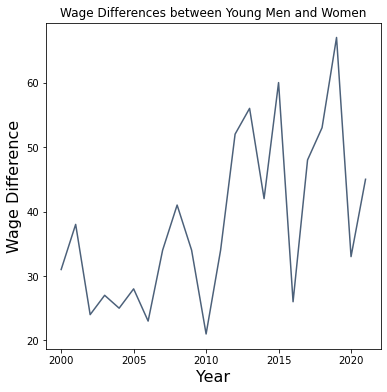

In [40]:
youth_diff_tbl.plot("Year", "Wage Difference")
plt.title("Wage Differences between Young Men and Women")

**Question 2g**: Looking at the graph you created, what do you notice? (e.g. Does the wage difference seem to go up over time?)

*Type out your answer here*

**Question 3a**: Similarly to what you did in **Question 2**, now create a new table for **All** age groups containing the `Year`, `Median Weekly Earnings (Men)`, `Median Weekly Earnings (Women)` and create a new column containing the **difference** between the two earnings each year. Again, in the cell below that, find the year containing the largest wage difference. 

In [41]:
male_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("Male")).column("Median Weekly Earnings")
female_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("Female")).column("Median Weekly Earnings")

MWearnings = all_earnings.select("Year")
MWearnings = MWearnings.with_column("Median Weekly Earnings (Men)", male_earnings).with_column("Median Weekly Earnings (Women)", female_earnings)
wage_diff = MWearnings.column("Median Weekly Earnings (Men)")-MWearnings.column("Median Weekly Earnings (Women)")

MWearnings = MWearnings.with_column("Wage Difference", wage_diff)
MWearnings

Year,Median Weekly Earnings (Men),Median Weekly Earnings (Women),Wage Difference
2000,641,493,148
2001,670,512,158
2002,679,529,150
2003,695,552,143
2004,713,573,140
2005,722,585,137
2006,743,600,143
2007,766,614,152
2008,798,638,160
2009,819,657,162


**Question 3b:** In the cell below, determine what year saw the biggest wage difference between men and women.

In [42]:
all_biggest_diff_yr = MWearnings.sort("Wage Difference", descending=True).column('Year').item(0)
all_biggest_diff_yr

2020

**Question 3c:** Create a line plot of the wage difference between men and women.

Text(0.5, 1.0, 'Wage Differences between Men and Women of All Ages')

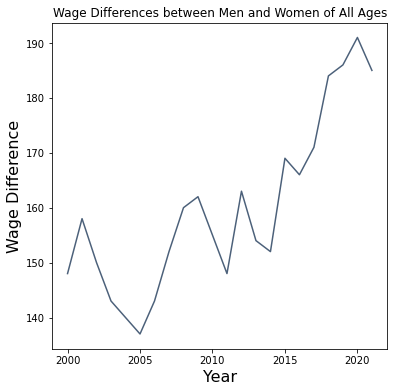

In [43]:
MWearnings.plot("Year", "Wage Difference")
plt.title("Wage Differences between Men and Women of All Ages")

**Question 3d**: Now looking at both of the graphs you created, what do you notice? Are there similarities between the differences in men and women wages among age groups?

*Type out your answer here*

## 2. Wage differences among youth between ethnicities

The data below was also pulled from the Bureau of Labor Statistics through this data filtering [table](https://www.bls.gov/webapps/legacy/cpswktab3.htm). 

In this section, we will explore the relationship between race, sex, and wages. Feel free to explore through the data and find different statistics.

The table below represents the number of workers and median weekly earnings of workers between 16-24 years old, separated by ethnicity and sex. 

In [44]:
wages_ethnicity = Table.read_table("Data/YouthEarningsByEthnicity.csv")
wages_ethnicity

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,16-24 Years Old,All,White,366
2001,16-24 Years Old,All,White,380
2002,16-24 Years Old,All,White,386
2003,16-24 Years Old,All,White,390
2004,16-24 Years Old,All,White,393
2005,16-24 Years Old,All,White,403
2006,16-24 Years Old,All,White,411
2007,16-24 Years Old,All,White,429
2008,16-24 Years Old,All,White,451
2009,16-24 Years Old,All,White,447


In this next section, let's find the largest difference between the average median weekly earnings between two demographic groups.

**Question 4a:** Create a table called `demographic_earnings` containing the mean of Median Weekly Earnings for each possible demographic group combination. 

*Hint:* Use the `group` function to group the data by Sex and Ethnicity category and aggregate the earnings by finding the mean.

In [45]:
demographic_earnings = wages_ethnicity.group(["Sex", "Ethnicity"], np.mean).select(0,1,4)
demographic_earnings

Sex,Ethnicity,Median Weekly Earnings mean
All,Asian,525.591
All,Black,412.091
All,Latinx,425
All,White,467.591
Female,Asian,519.091
Female,Black,405.818
Female,Latinx,408.318
Female,White,444.455
Male,Asian,536.773
Male,Black,418.773


**Question 4b:** Sort the table you created above in descending order.

In [46]:
demographic_earnings = demographic_earnings.sort("Median Weekly Earnings mean", descending = True)
demographic_earnings

Sex,Ethnicity,Median Weekly Earnings mean
Male,Asian,536.773
All,Asian,525.591
Female,Asian,519.091
Male,White,484.773
All,White,467.591
Female,White,444.455
Male,Latinx,436
All,Latinx,425
Male,Black,418.773
All,Black,412.091


**Question 4c:** Find the group that makes the most and the least on average and find the difference between the two earnings. 

*Hint:* You can use the `take` table method.

In [47]:
group1 = demographic_earnings.take(0)
group2 = demographic_earnings.take(demographic_earnings.num_rows - 1)

display(group1)
display(group2)

Sex,Ethnicity,Median Weekly Earnings mean
Male,Asian,536.773


Sex,Ethnicity,Median Weekly Earnings mean
Female,Black,405.818


In [48]:
diff = group1.column('Median Weekly Earnings mean').item(0) - group2.column('Median Weekly Earnings mean').item(0)
diff

130.95454545454544

Now let's look at how wages among each demographic group differ over time. Run the cell below and choose specific demographic groups you'd like to compare wages with by using the dropdown options below. 

In [49]:
#run this cell 

#function used to graph line plots comparing the Median Weekly Earning for two demographic groups over time
def demographics_comparison(s1, e1, s2, e2):
    group1 = wages_ethnicity.where("Ethnicity", are.equal_to(e1)).where("Sex", are.equal_to(s1))
    group2 = wages_ethnicity.where("Ethnicity", are.equal_to(e2)).where("Sex", are.equal_to(s2))
        
    label1 = e1 + " " + s1
    label2 = e2 + " " + s2

    plt.plot(group1["Year"], group1["Median Weekly Earnings"], label = label1)
    plt.plot(group2["Year"], group2["Median Weekly Earnings"], label = label2)
    plt.legend(loc='upper left')
    plt.title('Comparison of Two Demographic Groups')
    plt.xlabel("Year")
    plt.ylabel("Median Weekly Earnings")


    plt.show()

interact(demographics_comparison, 
         s1=widgets.Dropdown(
            options=['All', 'Male', 'Female'],
            value='All',
            description='Sex 1:',
            disabled=False),
         e1=widgets.Dropdown(
            options=['Asian', 'Black', 'Latinx', 'White'],
            value='Asian',
            description='Ethnicity 1:',
            disabled=False),
        s2=widgets.Dropdown(
            options=['All', 'Male', 'Female'],
            value='All',
            description='Sex 2:',
            disabled=False),
         e2=widgets.Dropdown(
            options=['Asian', 'Black', 'Latinx', 'White'],
            value='Black',
            description='Ethnicity 2:',
            disabled=False))

interactive(children=(Dropdown(description='Sex 1:', options=('All', 'Male', 'Female'), value='All'), Dropdown…

<function __main__.demographics_comparison(s1, e1, s2, e2)>

**Question 5:** What two demographic groups did you decide to look at? Why did you choose those two groups specifically? Did you observe anything interesting with the line plot?

*Type out your answer here*

## 3. Employment among the Youth

Now, we will look at the employment table. This table shows the employment status of the civilian noninstitutional population 16 to 24 years of age by sex, the employment status of whole population by race and sex, from 2000-2021.

The goal of this section is to learn how to clean the table and generate a histogram for the percent plot.

First, let's import the table.

In [50]:
employment = Table.read_table("Data/Employment.csv")
employment

Year,Number of Workers (In Thousands) (16-24 Years Old),Number of Male Workers (In Thousands) (16-24 Years Old),Number of Female Workers (In Thousands) (16-24 Years Old),Number of Workers (In Thousands),Number of Workers (In Thousands) (Men),Number of Workers (In Thousands) (Women),Number of Workers (In Thousands) (White),Number of Male Workers (In Thousands) (White),Number of Female Workers (In Thousands) (White),Number of Workers (In Thousands) (Black),Number of Male Workers (In Thousands) (Black),Number of Female Workers (In Thousands) (Black),Number of Workers (In Thousands) (Asian),Number of Male Workers (In Thousands) (Asian),Number of Female Workers (In Thousands) (Asian),Number of Workers (In Thousands) (Latinx),Number of Male Workers (In Thousands) (Latinx),Number of Female Workers (In Thousands) (Latinx)
2000,11864,6770,5094,101210,57107,44103,9868,5784,4084,1465,697,767,392,205,187,2357,1586,771
2001,11589,6555,5033,101041,56835,44206,9653,5625,4027,1411,644,767,393,212,181,2366,1579,787
2002,11121,6317,4804,100081,56345,43737,9274,5362,3912,1333,682,651,377,195,182,2294,1524,770
2003,10790,6158,4632,100302,56227,44076,8923,5190,3733,1223,606,616,330,189,142,2102,1385,717
2004,10876,6243,4633,101224,57001,44223,8947,5252,3695,1268,635,633,332,160,172,2175,1441,734
2005,11108,6396,4711,103560,58406,45154,9075,5351,3724,1337,668,668,309,173,136,2148,1453,696
2006,11362,6559,4802,106106,59747,46358,9280,5480,3800,1374,690,684,323,175,148,2311,1530,780
2007,11250,6458,4792,107339,60298,47041,9183,5395,3788,1364,686,678,323,162,161,2316,1494,822
2008,10621,5996,4625,106648,59439,47209,8591,4934,3657,1309,671,638,343,179,165,2035,1288,747
2009,8957,5014,3943,99820,55108,44712,7328,4160,3168,1034,509,526,280,164,117,1707,1063,645


First, we are going to clean the data. Since we are going to focus on the young workers, some of columns will be cleaned.

**Question 6:** Create a table called `employmentClean` containing the columns that reflect the young workers and several columns that can be compare to.

In [51]:
employmentClean = employment.select(0,1,2,3,4,5,6)
employmentClean

Year,Number of Workers (In Thousands) (16-24 Years Old),Number of Male Workers (In Thousands) (16-24 Years Old),Number of Female Workers (In Thousands) (16-24 Years Old),Number of Workers (In Thousands),Number of Workers (In Thousands) (Men),Number of Workers (In Thousands) (Women)
2000,11864,6770,5094,101210,57107,44103
2001,11589,6555,5033,101041,56835,44206
2002,11121,6317,4804,100081,56345,43737
2003,10790,6158,4632,100302,56227,44076
2004,10876,6243,4633,101224,57001,44223
2005,11108,6396,4711,103560,58406,45154
2006,11362,6559,4802,106106,59747,46358
2007,11250,6458,4792,107339,60298,47041
2008,10621,5996,4625,106648,59439,47209
2009,8957,5014,3943,99820,55108,44712


Next, we are going to show the percentage of male/female workers among young workers and the percentage of male/female workers among all workers.

**Question 7:** Create a table called `employmentPercentage` containing the columns that shows the above four data by year.

In [52]:
# generate the four columns
youngmale = employmentClean.column(2)/employmentClean.column(1)*100
youngfemale = employmentClean.column(3)/employmentClean.column(1)*100
allmale = employmentClean.column(5)/employmentClean.column(4)*100
allfemale = employmentClean.column(6)/employmentClean.column(4)*100

# form the table
employmentPercentage = Table().with_columns("Year",employmentClean.column(0),
                                "young male (%)", youngmale,
                                "young female(%)", youngfemale,
                                "all male(%)",allmale,
                                "all female(%)", allfemale)
employmentPercentage

Year,young male (%),young female(%),all male(%),all female(%)
2000,57.0634,42.9366,56.4243,43.5757
2001,56.5623,43.4291,56.2494,43.7506
2002,56.8024,43.1976,56.2994,43.7016
2003,57.0714,42.9286,56.0577,43.9433
2004,57.4016,42.5984,56.3117,43.6883
2005,57.5801,42.4109,56.3982,43.6018
2006,57.7275,42.2637,56.3088,43.6903
2007,57.4044,42.5956,56.1753,43.8247
2008,56.4542,43.5458,55.7338,44.2662
2009,55.9786,44.0214,55.2074,44.7926


**Question 8:** Before we plot the data, think of anything that is repeative in the table we generated. We could plot all four lines, but is there any way we could plot something more concise?

We could only plot one sex plot since there are only two Biological sex in this table and they add up to 100%.

**Question 9:** Plot the line graph of the sex percentage change of workers in young employment and in all employment by year.

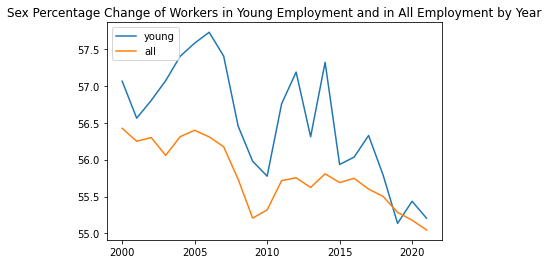

In [53]:
plt.plot(employmentPercentage.column("Year"), employmentPercentage.column("young male (%)"), label = "young")
plt.plot(employmentPercentage.column("Year"),employmentPercentage.column( "all male(%)"), label = "all")
plt.title("Sex Percentage Change of Workers in Young Employment and in All Employment by Year")
plt.legend(loc='upper left')
plt.show()

**Question 9:** Discuss what this plot means and what you can say about the employment of different sex among young and all.

*Type out your answer here*

## Congratulations! You have finished the notebook! ##

# 4. Data Science Opportunities
​
Here are some resources you can check out to explore data visualization further!
​
- [DATA 8 Textbook](https://inferentialthinking.com/chapters/07/Visualization.html)
- [Reference Sheet for the datascience Module](http://data8.org/sp22/python-reference.html)
- [Documentation for the datascience Modules](http://data8.org/datascience/index.html)
- [Cool Data Visualizations](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)
- [Statistica: Find Data on Interesting Topics](https://www.statista.com/)
- [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
​
This brings us to the end of the notebook. Now you can import a dataset of your choice and perform EDA using what you learned in this notebook!
​
---

# 5. Peer Consulting

If you had trouble with any content in this notebook, Data Peer Consultants are here to help! You can view their locations and availabilites at this link: https://data.berkeley.edu/education/data-peer-consulting.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world or other data science courses offered at Berkeley -- make sure to take advantage of this wonderful resource!


This brings us to the end of the notebook. Now you can try to use python table and plot skills for any table you found!

---